## FitBit Fitness Tracker Data
#### Daily Activite

<h3>import neccessey library<h3>


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

<h3>Read Data from Csv file<h3>

In [14]:
df = pd.read_csv('Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')


<H2>Preprocessing The Data<H2>


In [15]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [17]:
# checking if the Id is unique or not .
df['Id'].nunique()

33

In [18]:
#Determine the number of rows and columns
num_rows, num_columns = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 940
Number of columns: 15


In [22]:
# List all column names in the data
print("Column names:")
for column_name in data.columns:
    print(column_name)

Column names:
Id
ActivityDate
TotalSteps
TotalDistance
TrackerDistance
LoggedActivitiesDistance
VeryActiveDistance
ModeratelyActiveDistance
LightActiveDistance
SedentaryActiveDistance
VeryActiveMinutes
FairlyActiveMinutes
LightlyActiveMinutes
SedentaryMinutes
Calories


<h4>in this data we deal with the Total steps and minutes and we analyze the relationship between the total calories and we drop the Insignificant  columns from data<h4>

In [5]:
# Filter to make the data more handle and can deal with this data
data = [
    'Id','ActivityDate','TotalSteps','VeryActiveMinutes',
    'FairlyActiveMinutes','LightlyActiveMinutes',
    'SedentaryMinutes','Calories'
]
df = df[data]
df.head(10)

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
5,1503960366,4/17/2016,9705,38,20,164,539,1728
6,1503960366,4/18/2016,13019,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,50,31,264,775,2035
8,1503960366,4/20/2016,10544,28,12,205,818,1786
9,1503960366,4/21/2016,9819,19,8,211,838,1775


In [6]:
df.rename(columns={'ActivityDate':'Date'},inplace=True)
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
5,1503960366,4/17/2016,9705,38,20,164,539,1728
6,1503960366,4/18/2016,13019,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,50,31,264,775,2035
8,1503960366,4/20/2016,10544,28,12,205,818,1786
9,1503960366,4/21/2016,9819,19,8,211,838,1775


In [7]:
# Make this column to calc the total minutes for all acitivity miuntes
df['TotalMinutes'] = df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']+ df['VeryActiveMinutes']
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040
5,1503960366,4/17/2016,9705,38,20,164,539,1728,761
6,1503960366,4/18/2016,13019,42,16,233,1149,1921,1440
7,1503960366,4/19/2016,15506,50,31,264,775,2035,1120
8,1503960366,4/20/2016,10544,28,12,205,818,1786,1063
9,1503960366,4/21/2016,9819,19,8,211,838,1775,1076


In [8]:
# Make this column to calc the total Hours for all acitivity by divide the total miuntes to 60
df['TotalHours'] = np.round(df['TotalMinutes']/60)

In [9]:
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0
5,1503960366,4/17/2016,9705,38,20,164,539,1728,761,13.0
6,1503960366,4/18/2016,13019,42,16,233,1149,1921,1440,24.0
7,1503960366,4/19/2016,15506,50,31,264,775,2035,1120,19.0
8,1503960366,4/20/2016,10544,28,12,205,818,1786,1063,18.0
9,1503960366,4/21/2016,9819,19,8,211,838,1775,1076,18.0


In [10]:
# to know if found null value or not and check the data type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   Date                  940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   VeryActiveMinutes     940 non-null    int64  
 4   FairlyActiveMinutes   940 non-null    int64  
 5   LightlyActiveMinutes  940 non-null    int64  
 6   SedentaryMinutes      940 non-null    int64  
 7   Calories              940 non-null    int64  
 8   TotalMinutes          940 non-null    int64  
 9   TotalHours            940 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 73.6+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   Date                  940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   TotalMinutes          940 non-null    int64         
 9   TotalHours            940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [13]:
# Define a new Column that contain the Day of week
df['DayOfWeek'] = df['Date'].dt.day_name()

In [14]:
# show the data after all edition
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayOfWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
5,1503960366,2016-04-17,9705,38,20,164,539,1728,761,13.0,Sunday
6,1503960366,2016-04-18,13019,42,16,233,1149,1921,1440,24.0,Monday
7,1503960366,2016-04-19,15506,50,31,264,775,2035,1120,19.0,Tuesday
8,1503960366,2016-04-20,10544,28,12,205,818,1786,1063,18.0,Wednesday
9,1503960366,2016-04-21,9819,19,8,211,838,1775,1076,18.0,Thursday


<h3>Here we will check if there is any null values<h3>

In [15]:
df.isnull().sum()

Id                      0
Date                    0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
DayOfWeek               0
dtype: int64

no null Values 


In [16]:
df.duplicated().sum()

0

No Duplicated Value
<h3>Analysis and Visualization<h3>

In [17]:
df.describe()

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


<h4>we can notice from the TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes Columns that most people do not practice sports because the big difference between Total steps and active steps<h4>

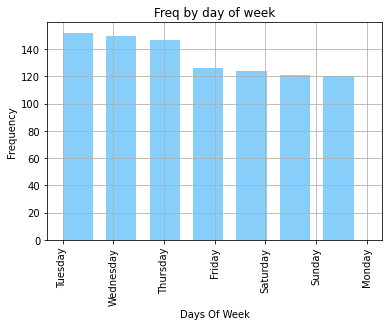

In [18]:
plt.figure(figsize=(6,4))
plt.hist(df['DayOfWeek'], bins=7, color='lightskyblue', width=0.6)
plt.xticks(rotation = 90)
plt.grid()
plt.title("Freq by day of week")
plt.xlabel('Days Of Week')
plt.ylabel('Frequency')
plt.show()

<h4>We notice that people are very active in tuesday, wednesday, and thursday, so we can send motivation message for people in the other days<h4>

In [19]:
# To select the numerical value only
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

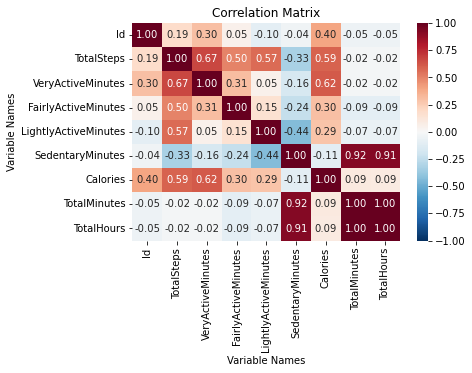

In [24]:
# Here we display the corr between all columns
heatmap = sns.heatmap(df[numerical_columns].corr(), cmap="RdBu_r", annot=True, fmt=".2f", vmin=-1, vmax=1)

heatmap.set_title("Correlation Matrix")
heatmap.set_xlabel("Variable Names")
heatmap.set_ylabel("Variable Names")

plt.show()

<h4>from the heatmap we can notice that the TotalSteps and VeryActiveMintues Columns have the highest influence on the Calories column<h4>

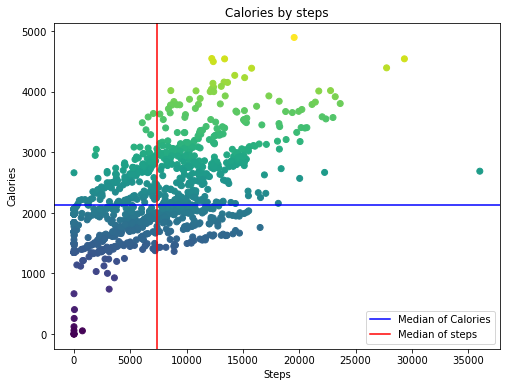

In [25]:
# Visualize the relationship between the TotalSteps column and the Calories column
plt.figure(figsize=(8,6))
plt.scatter(df['TotalSteps'],df['Calories'],c = df['Calories'])
mediansteps =  7405
medianCalory = 2134
plt.axhline(medianCalory, color = 'blue', label = "Median of Calories")
plt.axvline(mediansteps, color = 'red', label = "Median of steps")
plt.title("Calories by steps")
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.legend()
plt.show()

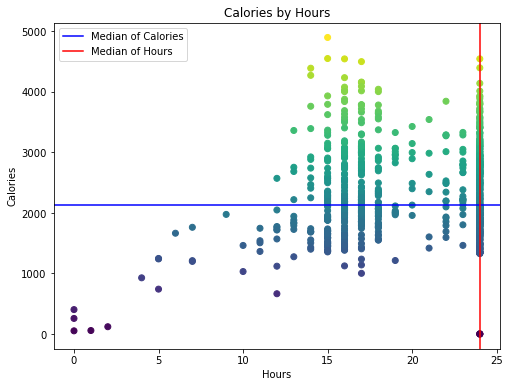

In [26]:
# Visualize the relationship between the TotalHours column and the Calories column
plt.figure(figsize=(8,6))
plt.scatter(df['TotalHours'],df['Calories'],c = df['Calories'])
medianHours =  24
medianCalory = 2134
plt.axhline(medianCalory, color = 'blue', label = "Median of Calories")
plt.axvline(medianHours, color = 'red', label = "Median of Hours")
plt.title("Calories by Hours")
plt.xlabel('Hours')
plt.ylabel('Calories')
plt.legend()
plt.show()

<h4>we notice that there is a weak relationship between them, and I think this happened because the few number of active minutes<h4>

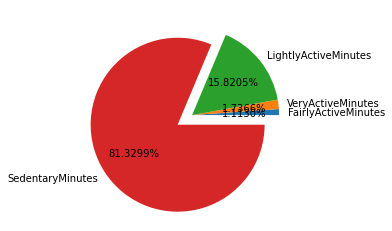

In [27]:
# Visualize the percentage of each column of these columns {VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes}
FairlyActiveMinutes = df['FairlyActiveMinutes'].sum()
VeryActiveMinutes = df['VeryActiveMinutes'].sum()
LightlyActiveMinutes = df['LightlyActiveMinutes'].sum()
SedentaryMinutes = df['SedentaryMinutes'].sum()

minuts = [FairlyActiveMinutes,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes]
label = ['FairlyActiveMinutes','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

plt.pie(minuts,labels=label,autopct='%1.4f%%',explode=[0,0,0,0.2])
plt.show()

<h3>we can say that 81 percent of users use the program to calculate calories burned in normal daily activities, and they are also very active in the middle and end of the week<h3>

## Modeling with H2O


In [2]:
pip install h2o 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 709.2 kB/s eta 0:00:0000:0100:08
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ODeepLearningEstimator, H2ORandomForestEstimator, H2OXGBoostEstimator, H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

# Initialize H2O
h2o.init()

# Load the dataset
data = h2o.import_file('Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 13 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_mayahany_8yu8aq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
# Split the data into train and test sets
train, test = data.split_frame(ratios=[0.8], seed=1234)

In [4]:
# Define the response column
response_column = "VeryActiveMinutes"

In [8]:
# Define the list of classification algorithms and their hyperparameters for grid search
algorithms = [
    ("GBM", H2OGradientBoostingEstimator, {"ntrees": [50, 100, 150], "max_depth": [3, 5, 7]}),
    ("DeepLearning", H2ODeepLearningEstimator, {"hidden": [[50, 50], [100, 100], [200, 200]]}),
    ("RandomForest", H2ORandomForestEstimator, {"ntrees": [50, 100, 150], "max_depth": [3, 5, 7]}),
    ("GLM", H2OGeneralizedLinearEstimator, {"alpha": [0.1, 0.5, 0.9]}),
]

In [9]:
# Dictionary to store models
models = {}

# Train and evaluate models
for algorithm_name, algorithm, hyperparams in algorithms:
    # Grid search for hyperparameter tuning
    grid = H2OGridSearch(algorithm(), hyperparams)
    grid.train(x=data.columns, y=response_column, training_frame=train)
    best_model = grid.get_grid()[0]
    models[algorithm_name] = best_model
    print(f"{algorithm_name} model trained.")

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
GBM model trained.
deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%
DeepLearning model trained.
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
RandomForest model trained.
glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
GLM model trained.


/Users/mayahany/opt/anaconda3/lib/python3.9/site-packages/h2o/grid/grid_search.py:434: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


In [10]:
# Evaluate models using MSE as the evaluation metric
evaluations = {}
for algorithm_name, model in models.items():
    mse = model.model_performance(test).mse()
    evaluations[algorithm_name] = mse
    print(f"{algorithm_name} model MSE: {mse}")

GBM model MSE: 85.8416859920576
DeepLearning model MSE: 118.81773333807607
RandomForest model MSE: 103.5943791891875
GLM model MSE: 150.1000514230171


In [11]:
# Find the best model based on the evaluation metric
best_model_name = min(evaluations, key=evaluations.get)
best_model = models[best_model_name]
print(f"The best model is {best_model_name} with MSE: {evaluations[best_model_name]}")

The best model is GBM with MSE: 85.8416859920576


In [ ]:
# Shutdown H2O
h2o.shutdown()